<a href="https://colab.research.google.com/github/kunalmahadik/ML-Classification/blob/main/Credit_Card_Default_Prediction_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Predicting whether a customer will default on his/her credit card </u></b>

## <b> Problem Description </b>

### This project is aimed at predicting the case of customers default payments in Taiwan. From the perspective of risk management, the result of predictive accuracy of the estimated probability of default will be more valuable than the binary result of classification - credible or not credible clients. We can use the [K-S chart](https://www.listendata.com/2019/07/KS-Statistics-Python.html) to evaluate which customers will default on their credit card payments


## <b> Data Description </b>

### <b>Attribute Information: </b>

### This research employed a binary variable, default payment (Yes = 1, No = 0), as the response variable. This study reviewed the literature and used the following 23 variables as explanatory variables:
* ### X1: Amount of the given credit (NT dollar): it includes both the individual consumer credit and his/her family (supplementary) credit.
* ### X2: Gender (1 = male; 2 = female).
* ### X3: Education (1 = graduate school; 2 = university; 3 = high school; 4 = others).
* ### X4: Marital status (1 = married; 2 = single; 3 = others).
* ### X5: Age (year).
* ### X6 - X11: History of past payment. We tracked the past monthly payment records (from April to September, 2005) as follows: X6 = the repayment status in September, 2005; X7 = the repayment status in August, 2005; . . .;X11 = the repayment status in April, 2005. The measurement scale for the repayment status is: -1 = pay duly; 1 = payment delay for one month; 2 = payment delay for two months; . . .; 8 = payment delay for eight months; 9 = payment delay for nine months and above.
* ### X12-X17: Amount of bill statement (NT dollar). X12 = amount of bill statement in September, 2005; X13 = amount of bill statement in August, 2005; . . .; X17 = amount of bill statement in April, 2005.
* ### X18-X23: Amount of previous payment (NT dollar). X18 = amount paid in September, 2005; X19 = amount paid in August, 2005; . . .;X23 = amount paid in April, 2005.

## Business Objective:

*  The objective of this project is to predict which customer might default in coming months. First, let's understand what do we actually mean by Credit Card Default.
* A credit card is a thin rectangular piece of plastic or metal issued by a bank or financial services company, that allows cardholders to borrow funds with which to pay for goods and services with merchants that accept cards for payment.
* Default usually happens after six months in a row of not making at least the minimum payment due, which means the person's credit card is seriously delinquent. During that time the person will be contacted by the creditor and they will want to know what the person is going to do about it. If they are not satisfied with the person's response (or the lack thereof), the account will be closed and after 180 days with no payment, reported as charged off to the credit bureaus.
* The research aims at developing a mechanism to predict the credit card default beforehand and to identify the potential customer base that can be offered various credit instruments so as to invite minimum default.

## Importing essential modules and loading dataset

In [ ]:
# Importing libraries and modules required
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px

import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)

## Mounting the drive and importing the dataset

In [ ]:
# mounting the google drive for importing the dataset
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#upgrading the xlrd module to avoid the error in reading excel file
!pip install --upgrade xlrd

In [ ]:
# load the credit default of credit card clients
credit_df = pd.read_excel('/content/drive/MyDrive/AlmaBetter/dataset/default of credit card clients.xls', header = 1)

## **Understanding more about the data**

##Summary of the data

In [ ]:
# Glancing through top 5 rows
credit_df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [ ]:
# Glancing through bottom 5 rows of the data
credit_df.tail()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
29995,29996,220000,1,3,1,39,0,0,0,0,0,0,188948,192815,208365,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29996,29997,150000,1,3,2,43,-1,-1,-1,-1,0,0,1683,1828,3502,8979,5190,0,1837,3526,8998,129,0,0,0
29997,29998,30000,1,2,2,37,4,3,2,-1,0,0,3565,3356,2758,20878,20582,19357,0,0,22000,4200,2000,3100,1
29998,29999,80000,1,3,1,41,1,-1,0,0,0,-1,-1645,78379,76304,52774,11855,48944,85900,3409,1178,1926,52964,1804,1
29999,30000,50000,1,2,1,46,0,0,0,0,0,0,47929,48905,49764,36535,32428,15313,2078,1800,1430,1000,1000,1000,1


In [ ]:
# Getting the shape of rows and columns present in our dataset
print(f'There are {credit_df.shape[0]} records and {credit_df.shape[1]} features in the dataset')

There are 30000 records and 25 features in the dataset


In [ ]:
# Getting all the feature names
print('Features in the dataset:')
credit_df.columns

Features in the dataset:


Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')

In [ ]:
# Checking the basic structure of the dataset
credit_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   ID                          30000 non-null  int64
 1   LIMIT_BAL                   30000 non-null  int64
 2   SEX                         30000 non-null  int64
 3   EDUCATION                   30000 non-null  int64
 4   MARRIAGE                    30000 non-null  int64
 5   AGE                         30000 non-null  int64
 6   PAY_0                       30000 non-null  int64
 7   PAY_2                       30000 non-null  int64
 8   PAY_3                       30000 non-null  int64
 9   PAY_4                       30000 non-null  int64
 10  PAY_5                       30000 non-null  int64
 11  PAY_6                       30000 non-null  int64
 12  BILL_AMT1                   30000 non-null  int64
 13  BILL_AMT2                   30000 non-null  int64
 14  BILL_A

There are 30000 entries and 25 features with all 30000 non null records, indicating we don't have any null values. All the features have int64 datatype. We need to further look into in to segregate the categorical features.

In [ ]:
# Getting the unique value count of each feature
credit_df.nunique()

ID                            30000
LIMIT_BAL                        81
SEX                               2
EDUCATION                         7
MARRIAGE                          4
AGE                              56
PAY_0                            11
PAY_2                            11
PAY_3                            11
PAY_4                            11
PAY_5                            10
PAY_6                            10
BILL_AMT1                     22723
BILL_AMT2                     22346
BILL_AMT3                     22026
BILL_AMT4                     21548
BILL_AMT5                     21010
BILL_AMT6                     20604
PAY_AMT1                       7943
PAY_AMT2                       7899
PAY_AMT3                       7518
PAY_AMT4                       6937
PAY_AMT5                       6897
PAY_AMT6                       6939
default payment next month        2
dtype: int64

There are some features with value counts less than 20 which seems to be categorical features like Sex, Marriage, Education. We need to dive deep to understand them. If they are categorical, we will update their datatype of object datatype

In [ ]:
# Checking the descriptive statistics of the features of the dataset
credit_df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,30000.0,15000.500000,8660.398374,1.0,7500.75,15000.5,22500.25,30000.0
LIMIT_BAL,30000.0,167484.322667,129747.661567,10000.0,50000.00,140000.0,240000.00,1000000.0
SEX,30000.0,1.603733,0.489129,1.0,1.00,2.0,2.00,2.0
EDUCATION,30000.0,1.853133,0.790349,0.0,1.00,2.0,2.00,6.0
MARRIAGE,30000.0,1.551867,0.521970,0.0,1.00,2.0,2.00,3.0
AGE,30000.0,35.485500,9.217904,21.0,28.00,34.0,41.00,79.0
PAY_0,30000.0,-0.016700,1.123802,-2.0,-1.00,0.0,0.00,8.0
PAY_2,30000.0,-0.133767,1.197186,-2.0,-1.00,0.0,0.00,8.0
PAY_3,30000.0,-0.166200,1.196868,-2.0,-1.00,0.0,0.00,8.0
PAY_4,30000.0,-0.220667,1.169139,-2.0,-1.00,0.0,0.00,8.0


As we can see:
        there is large difference in mean and median  for bill paid and bill generated features indicating skewed distribution of data. We will plot them to understand the distribution and outliers if present any.
        The "default payment next month" is the target variable.

        
        The average value for the amount of credit card limit is 167484. The standard deviation is unusually large, max value being 1000000.
       

  Since the average of education is 1.85 we can say that education Level is mostly graduate school and university.

    Average age is 35.5 years, with a standard deviation of 9.2

  As the value 0 for default payment means 'not default' and value 1 means 'default', the mean of 0.22 means that there are 22% of credit card contracts that will default next month (will verify this in the next sections of this analysis).

### Features Description

**Following is the description of our features:**

* ***ID: ID of each client*** 

* ***LIMIT_BAL: Amount of given credit in NT dollars ***

* ***SEX: Gender (1 = male, 2 = female)*** 

* ***EDUCATION: (1 = graduate school, 2 = university, 3 = high school, 0,4,5,6 = others)***

* ***MARRIAGE: Marital status (0 = others, 1 = married, 2 = single, 3 = others)***

* ***AGE: Age in years***

**Scale for PAY_0 to PAY_6** : 

***(-2, -1, 0 = paid duly,  1 = payment delay for one month, 2 = payment delay for two months, ... 8 = payment delay for eight months, 9 = payment delay for nine months and above***)

* ***PAY_0: Repayment status in September, 2005 (scale same as above***) 

* ***PAY_2: Repayment status in August, 2005 (scale same as above)***

* ***PAY_3: Repayment status in July, 2005 (scale same as above)***

* ***PAY_4: Repayment status in June, 2005 (scale same as above)***

* ***PAY_5: Repayment status in May, 2005 (scale same as above)***

* ***PAY_6: Repayment status in April, 2005 (scale same as above)***

* ***BILL_AMT1: Amount of bill statement in September, 2005 (NT dollar)***

* ***BILL_AMT2: Amount of bill statement in August, 2005 (NT dollar)***

* ***BILL_AMT3: Amount of bill statement in July, 2005 (NT dollar)***

* ***BILL_AMT4: Amount of bill statement in June, 2005 (NT dollar)***

* ***BILL_AMT5: Amount of bill statement in May, 2005 (NT dollar)***

* ***BILL_AMT6: Amount of bill statement in April, 2005 (NT dollar)***

* ***PAY_AMT1: Amount of previous payment in September, 2005 (NT dollar)***

* ***PAY_AMT2: Amount of previous payment in August, 2005 (NT dollar)***

* ***PAY_AMT3: Amount of previous payment in July, 2005 (NT dollar)***

* ***PAY_AMT4: Amount of previous payment in June, 2005 (NT dollar)***

* ***PAY_AMT5: Amount of previous payment in May, 2005 (NT dollar)***

* ***PAY_AMT6: Amount of previous payment in April, 2005 (NT dollar)***

* ***default.payment.next.month: Default payment, our target variable (1=yes, 0=no)***

**In our dataset we got customer credit card transaction history for past 6 months, on basis of which we have to predict if customer will default or not.**

## **Data Preparation - Cleaning and Preprocessing**


In data preparation, we treat the raw data to enhance its quality and reliability. In order to do so, we perform following checks:

1. Handling Missing Values

2. Handling duplicates

3. Improper structure and formats

4. Handling outliers

### **Missing values check**

**Why do we need to handle missing values?**
* Missing values could be a result of data corruption or failure to record data in real-world data. During preprocessing , it is one of very initial and important step since many machine learning algorithms throws error for missing values. They should be handled carefully as per the problem statement else, it might lead to errorous data and deviated insights. It is very important to understnd how missing values should be treated.

In [ ]:
# Checking for count of missing values in each column

#printing the sum of total missing values in the dataset
print(f'Total null values are :{credit_df.isnull().sum().sum()}')

#checking missing values for every individual feature
credit_df.isnull().sum()

Total null values are :0


ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default payment next month    0
dtype: int64

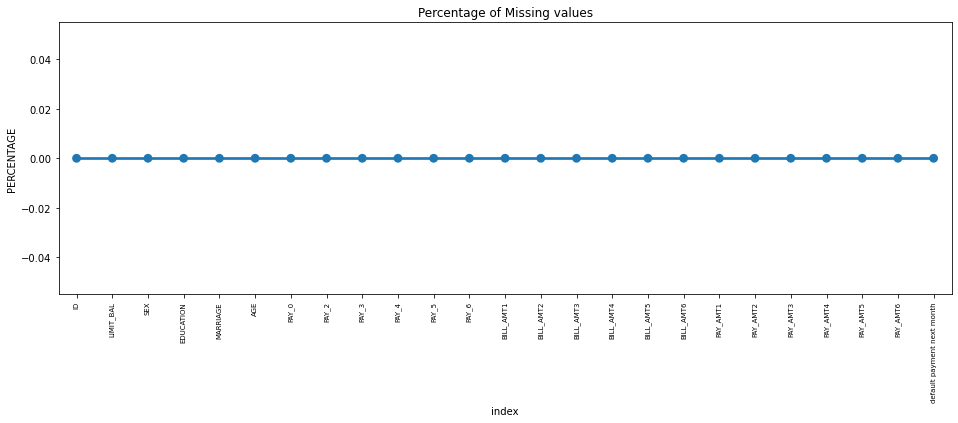

In [ ]:
#plot the graph to check the missing values in the dataset
missing = pd.DataFrame((credit_df.isnull().sum())*100/credit_df.shape[0]).reset_index()  #defining a dataframe to store percent of missing values present in the dataset
plt.figure(figsize=(16,5)) #defiing the size of the figure
ax = sns.pointplot('index',0,data=missing) #plotting a point plot 
plt.xticks(rotation =90,fontsize =7) #rorating the ticks of x axis for better visibility of the feature name
plt.title("Percentage of Missing values") #title of the plot
plt.ylabel("PERCENTAGE") #y label of the plot
plt.show()

**As we can see from above plot, luckily we don't haave any missing values in the dataset.**

### **Duplicate Values Check**

**Why is it important to remove duplicate records from my data?** 
* Duplication means redundant duplicate records in the dataset. This could be possibly due to data entry errors or data collection methods.

*  removing duplicates from our data set could save investment as it may increase the size of data unncessarily. Also, it could increase the complexity of data while analysis.

In [ ]:
# Checking the duplicate values
duplicate_value = credit_df.duplicated().sum()
#value = len(credit_df[credit_df.duplicated()]) #storing the total duplicated values in the dataset in a variable
print('Total duplicated values in the dataset are:', duplicate_value)

Total duplicated values in the dataset are: 0


***There are no missing values as well as there are no duplicate records in the dataset***




### **Improper structure and formats**

Improper struture of data is crucial step from analysis perspective. We should look into the fact the datatype assigned is actually correct pertainng to the data or not. Our goal is to make the dataset more readble and clean so we can perfrom EDA with effective appraoch. 

In [ ]:
#renaming the coulmns as per the data description for better readability
credit_df.rename(columns={'LIMIT_BAL': 'credit_limit',
                   'SEX': 'gender',
                   'EDUCATION' : 'education',
                   'MARRIAGE' : 'marital_status',
                   'AGE' : 'age',
                   'PAY_0': 'payment_status_sept',
                   'PAY_2': 'payment_status_aug',
                   'PAY_3': 'payment_status_jul',
                   'PAY_4': 'payment_status_jun',
                   'PAY_5': 'payment_status_may',
                   'PAY_6': 'payment_status_apr',
                   'BILL_AMT1': 'bill_sept',
                   'BILL_AMT2': 'bill_aug',
                   'BILL_AMT3': 'bill_jul',
                   'BILL_AMT4': 'bill_jun',
                   'BILL_AMT5': 'bill_may',
                   'BILL_AMT6': 'bill_apr',
                   'PAY_AMT1': 'payment_amount_sept',
                   'PAY_AMT2': 'payment_amount_aug',
                   'PAY_AMT3': 'payment_amount_jul',
                   'PAY_AMT4': 'payment_amount_jun',
                   'PAY_AMT5': 'payment_amount_may',
                   'PAY_AMT6': 'payment_amount_apr',
                   'dpnm' : 'default_payment'}, inplace=True)

In [ ]:
#converting the categorical features into object datatype
credit_df[['gender','education','marital_status','payment_status_sept','payment_status_aug','payment_status_jul',
    'payment_status_jun','payment_status_may','payment_status_apr']] =credit_df[['gender','education','marital_status','payment_status_sept','payment_status_aug','payment_status_jul',
    'payment_status_jun','payment_status_may','payment_status_apr']].apply(lambda x: x.astype('object'))

credit_df.info() #checking whether the datatype has updated

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   ID                          30000 non-null  int64 
 1   credit_limit                30000 non-null  int64 
 2   gender                      30000 non-null  object
 3   education                   30000 non-null  object
 4   marital_status              30000 non-null  object
 5   age                         30000 non-null  int64 
 6   payment_status_sept         30000 non-null  object
 7   payment_status_aug          30000 non-null  object
 8   payment_status_jul          30000 non-null  object
 9   payment_status_jun          30000 non-null  object
 10  payment_status_may          30000 non-null  object
 11  payment_status_apr          30000 non-null  object
 12  bill_sept                   30000 non-null  int64 
 13  bill_aug                    30000 non-null  in

In [ ]:
#we can either drop the id column, or we can set id column as the index.
credit_df.set_index('ID', inplace = True)
credit_df

,credit_limit,gender,education,marital_status,age,payment_status_sept,payment_status_aug,payment_status_jul,payment_status_jun,payment_status_may,payment_status_apr,bill_sept,bill_aug,bill_jul,bill_jun,bill_may,bill_apr,payment_amount_sept,payment_amount_aug,payment_amount_jul,payment_amount_jun,payment_amount_may,payment_amount_apr,default payment next month
ID,,,,,,,,,,,,,,,,,,,,,,,,
1,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1
2,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
5,50000,1,2,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29996,220000,1,3,1,39,0,0,0,0,0,0,188948,192815,208365,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29997,150000,1,3,2,43,-1,-1,-1,-1,0,0,1683,1828,3502,8979,5190,0,1837,3526,8998,129,0,0,0
29998,30000,1,2,2,37,4,3,2,-1,0,0,3565,3356,2758,20878,20582,19357,0,0,22000,4200,2000,3100,1


## **Handling Outlier**

Oultiers are the data points which are very far -- need to add explanation--

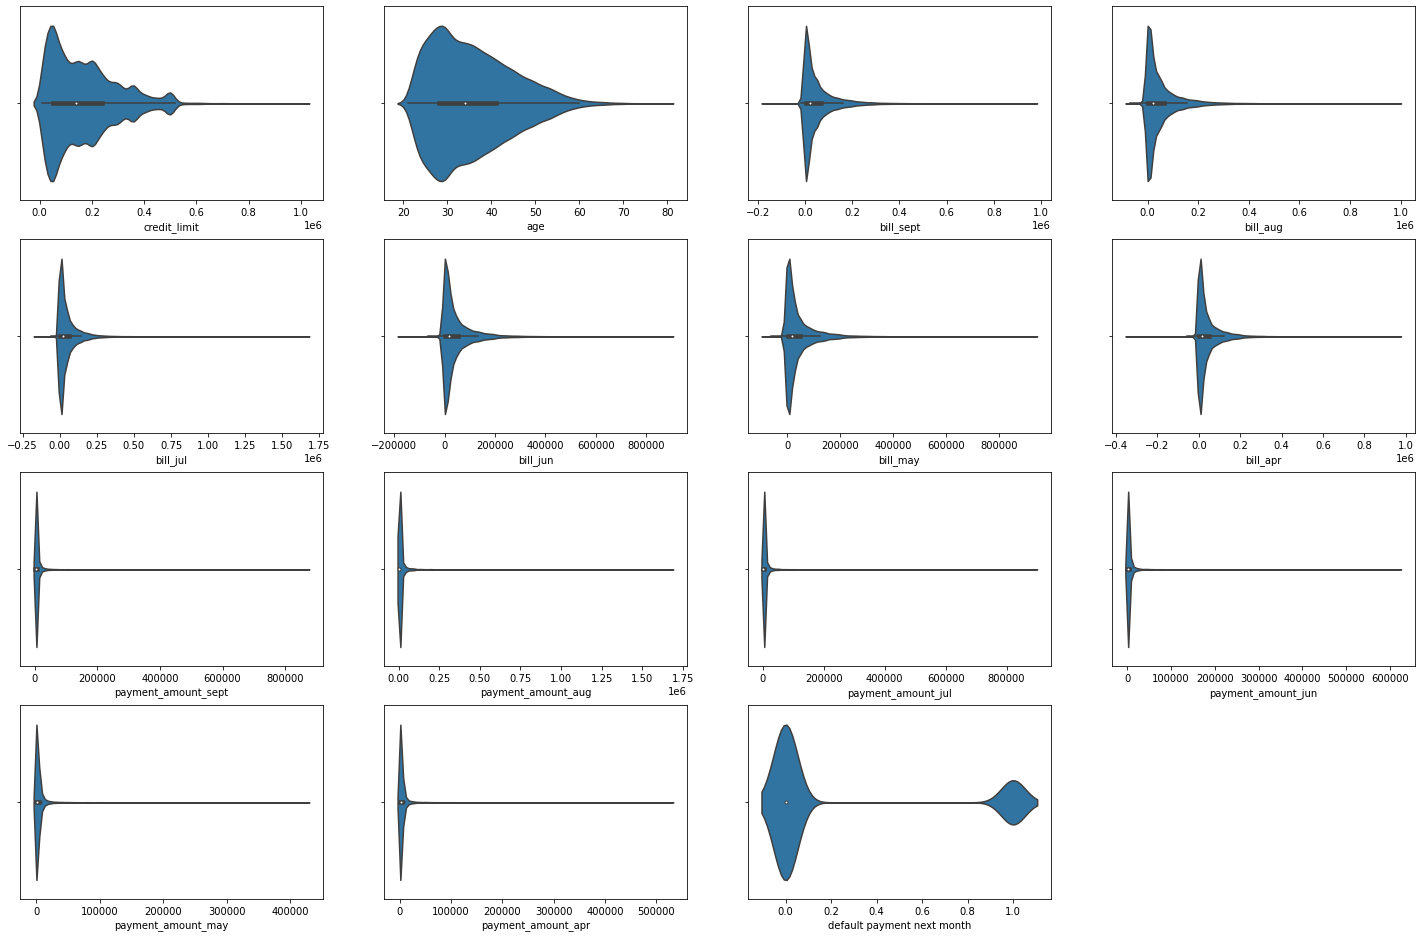

In [ ]:
#lets check the distribution of dataset and the if any outliers are present.

#plotting a violin plot for all numerical features
feat_num = credit_df.select_dtypes(include =['int64', 'float64'])

plt.figure(figsize=(25,25))
n=1

for column in feat_num:
  plt.subplot(6,4,n)
  n = n+1
  sns.violinplot(credit_df[column])

As we can see, the distribution is close to normal distribution, but we do have many outliers present, which needs to get treated.

In [ ]:
#Treating the outliers, using IQR method and cappping them to the highest value
def outlier_treatment(datacolumn):
 sorted(datacolumn)
 Q1,Q3 = np.percentile(datacolumn , [25,75])
 IQR = Q3 - Q1
 lower_range = Q1 - (1.5 * IQR)
 upper_range = Q3 + (1.5 * IQR)
 return lower_range,upper_range

 #checking the lower and upper bound
 for i in feat_num:
   lowerbound,upperbound = outlier_treatment(i)
   i[(i < lowerbound) | (i > upperbound)]
   credit_df.drop(credit_df[ (i > upperbound) | (i < lowerbound) ].index , inplace=True)



## **Exploratory Data Analysis**

**Why do we perform EDA?**
* ***An EDA is a thorough examination meant to uncover the underlying structure of a data set and is important for a company because it exposes trends, patterns, and relationships that are not readily apparent.***

**Univariate Analysis**

**Why do you do univariate analysis?**
* ***The key objective of Univariate analysis is to simply describe the data and visualize various features to find patterns within the data.*** 

**Analysis of dependent Variable:**

In [ ]:
# renaming for better convenience
credit_df.rename(columns={'default payment next month' : 'isDefaulter'}, inplace = True)

In [ ]:
# checking the balance of the dpendent variable
credit_df['isDefaulter'].value_counts()

0    23364
1     6636
Name: isDefaulter, dtype: int64

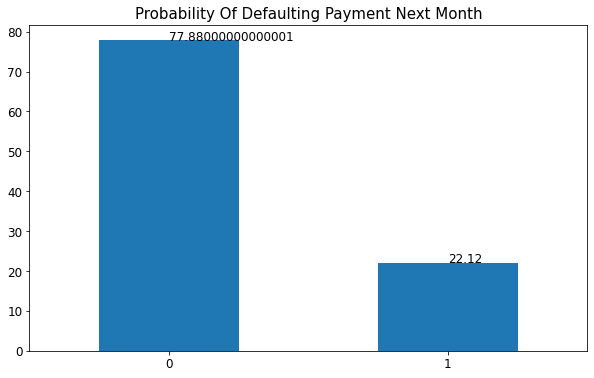

In [ ]:
#plotting the count plot to vizualize the data distribution 
def_cnt = (credit_df.isDefaulter.value_counts(normalize=True)*100)
def_cnt.plot.bar(figsize=(10,6))
plt.xticks(fontsize=12, rotation=0)
plt.yticks(fontsize=12)
plt.title("Probability Of Defaulting Payment Next Month", fontsize=15)
for x,y in zip([0,1],def_cnt):
    plt.text(x,y,y,fontsize=12)
plt.show()



**From the above data analysis we can say that**
*   **0 - Not Default**
*   **1 - Default**
*   ***About 22% people are expected to default next month and 77.8% are not expected to default***

***It is evident that the both classes are not in proportion and we have an imbalanced dataset, we need to balance the data.***

**Analysis of Independent Variable:**

***There are few categorical variables in the dataset:***
*   sex
*   education
*   marraige 
*   age

***Categorical variables are qualitative data in which the values are assigned to a set of distinct groups or categories. These groups may consist of alphabetic (e.g., male, female) or numeric labels (e.g., male = 0, female = 1) that do not contain mathematical information beyond the frequency counts related to group membership.***

 ***Let's check how they are related with out target class.***

### **SEX**

* 1 - Male
* 2 - Female

In [ ]:
# Counting the number of males and females in the dataset
credit_df['SEX'].value_counts()

2    18112
1    11888
Name: SEX, dtype: int64

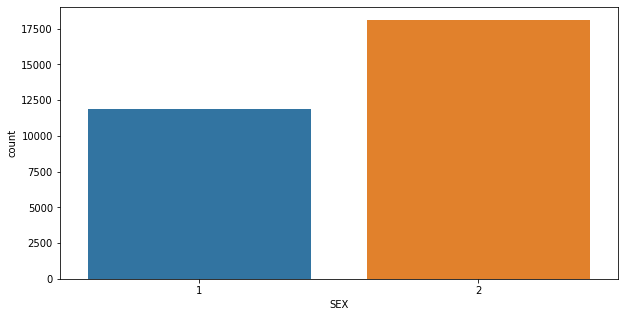

In [ ]:
# Plotting the count plot of variable SEX for better visualization
plt.figure(figsize = (10,5))
sns.countplot(x = 'SEX', data = credit_df)

**From the above data analysis we can say that**
*   **1 - Male**
*   **2 - Female**
*   ***Number of Male credit holder is less than Female.***

### **Education**
* **1 - graduate school**
* **2 - University**
* **3 - High school**
* **0,4,5,6 - others**

In [ ]:
# Count each category in education feature
credit_df['EDUCATION'].value_counts()

2    14030
1    10585
3     4917
5      280
4      123
6       51
0       14
Name: EDUCATION, dtype: int64

***Since the categories 0,4,5,6 are lesser in count and they correspond to 'other' section, we will combine those to form a single category named 'other'.***

In [ ]:
# Merging 0,4,5,6 to 0 and define 0 as 'others'

credit_df['EDUCATION'] = credit_df['EDUCATION'].replace({4:0, 5:0, 6:0})
credit_df['EDUCATION'].value_counts()

2    14030
1    10585
3     4917
0      468
Name: EDUCATION, dtype: int64

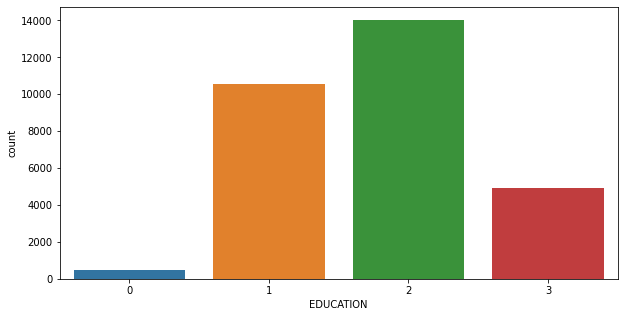

In [ ]:
# plotting the count of each category for better visualization
plt.figure(figsize = (10,5))
sns.countplot(x = 'EDUCATION', data = credit_df)

***From the above distribution we can say that***
* More number of credit card holders are university students followed by graduates and high school

### **Marriage**
* 1 - married
* 2 - single
* 0,3 - others

In [ ]:
# getting count of each category in marriage feature
credit_df['MARRIAGE'].value_counts()

2    15964
1    13659
3      323
0       54
Name: MARRIAGE, dtype: int64

***Combining 0 and 3 as they are low in count to form a single category as 'others'***

In [ ]:
# Combine 0 and 3 by changing the value 0 into others

credit_df['MARRIAGE'] = credit_df['MARRIAGE'].replace({0:3})
credit_df['MARRIAGE'].value_counts(normalize = True)

2    0.532133
1    0.455300
3    0.012567
Name: MARRIAGE, dtype: float64

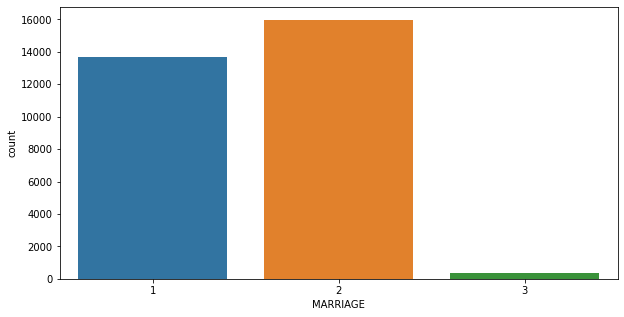

In [ ]:
# Plotting the count of each category in Marriage feature for better visualization
plt.figure(figsize = (10,5))
sns.countplot(x = 'MARRIAGE', data = credit_df)

**From the above distribution we can say that**

* **1 - married**
* **2 - single**
* **3 - others**
* ***More number of credit card holders are Single***

### **AGE**

In [ ]:
# Getting the count of credit card holders corresponding to age 
credit_df['AGE'].value_counts()

29    1605
27    1477
28    1409
30    1395
26    1256
31    1217
25    1186
34    1162
32    1158
33    1146
24    1127
35    1113
36    1108
37    1041
39     954
38     944
23     931
40     870
41     824
42     794
44     700
43     670
45     617
46     570
22     560
47     501
48     466
49     452
50     411
51     340
53     325
52     304
54     247
55     209
56     178
58     122
57     122
59      83
60      67
21      67
61      56
62      44
63      31
64      31
66      25
65      24
67      16
69      15
70      10
68       5
73       4
72       3
75       3
71       3
79       1
74       1
Name: AGE, dtype: int64

In [ ]:
#checking the mean of the age group respect to the default_payment_next_month
credit_df.groupby('isDefaulter')['AGE'].mean()

isDefaulter
0    35.417266
1    35.725738
Name: AGE, dtype: float64

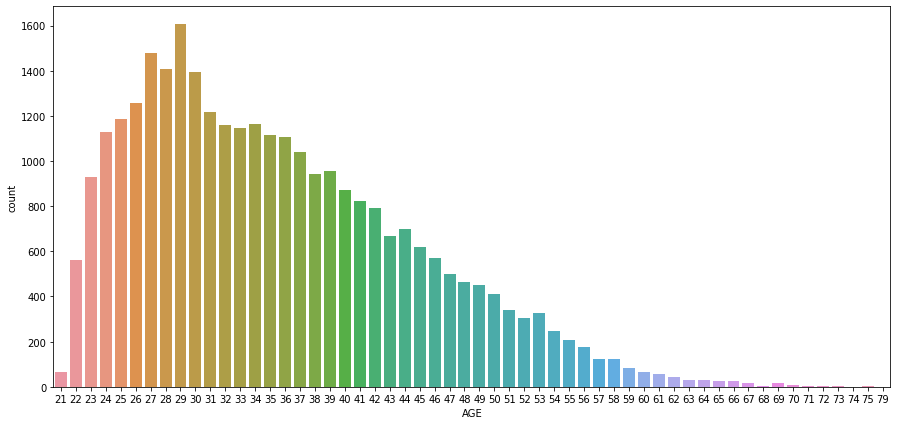

In [ ]:
#plotting the count plot to vizualize the data distribution
plt.figure(figsize=(15,7))
sns.countplot(x = 'AGE', data = credit_df)
plt.show()

**From the above visualization we can say that**
*  ***We can see more number of credit cards holder age are between 26-30 years old.***
*  ***Age above 60 years old rarely uses the credit card.***

**Creating bins for age groups from 21-30, 31-40,41-50, 51-60, 61-70, 71-80**

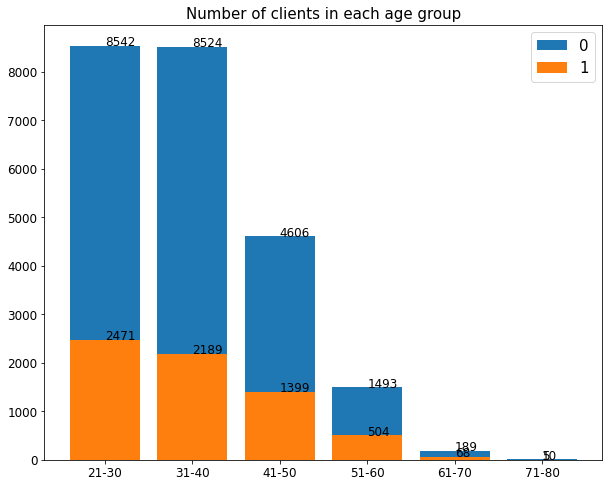

In [ ]:
# Creating bins for age groups from 21-30, 31-40, 
bins = [20,30,40,50,60,70,80]
names = ['21-30','31-40','41-50','51-60','61-70','71-80']
credit_df['AGE_BIN'] = pd.cut(x=credit_df.AGE, bins=bins, labels=names, right=True)

age_cnt = credit_df.AGE_BIN.value_counts()
age_0 = (credit_df.AGE_BIN[credit_df['isDefaulter'] == 0].value_counts())
age_1 = (credit_df.AGE_BIN[credit_df['isDefaulter'] == 1].value_counts())

plt.subplots(figsize=(10,8))
plt.bar(age_0.index, age_0.values, label='0')
plt.bar(age_1.index, age_1.values, label='1')
for x,y in zip(names,age_0):
    plt.text(x,y,y,fontsize=12)
for x,y in zip(names,age_1):
    plt.text(x,y,y,fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title("Number of clients in each age group", fontsize=15)
plt.legend(loc='upper right', fontsize=15)
plt.show()

* **We have maximum clients from 21-30 age group followed by 31-40. Hence with increasing age group the number of clients that will default is decreasing.**
* **Age is an important feature to predict the default payment for next month.**

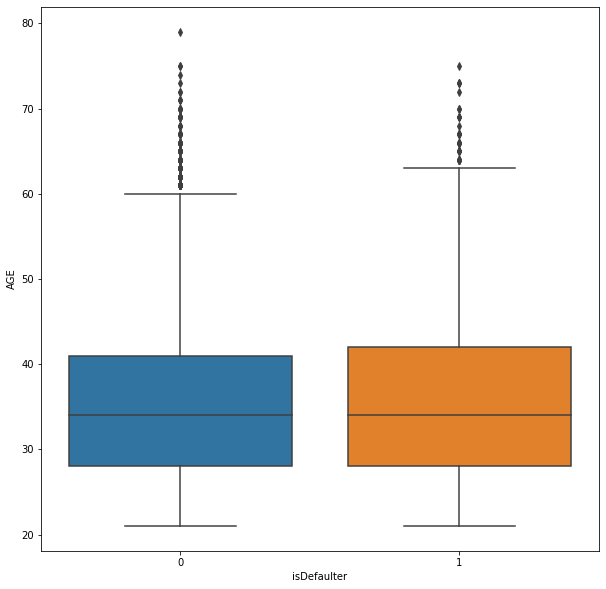

In [ ]:
#plotting the box plot to vizualize the data distribution
plt.figure(figsize=(10,10))
ax = sns.boxplot(x="isDefaulter", y="AGE", data=credit_df)

**From the above boxplot we can say that**
* **0 - will not default payment next month**
* **1 - will default payment next month**
* **The middle 50% of the data ranges from about 28 to 42 years of age for both defaulters and non defaulters**
* **There are outliers present in both the classes**

## **Numerical Features**

**What is Numerical Data**

* ***Numerical data is a data type expressed in numbers, rather than natural language description. Sometimes called quantitative data, numerical data is always collected in number form. Numerical data differentiates itself from other number form data types with its ability to carry out arithmetic operations with these numbers.***

### **Limit Balance**

In [ ]:
# Checking the descriptive statistics of Limit Balance feature in the dataset
credit_df['LIMIT_BAL'].describe()

count      30000.000000
mean      167484.322667
std       129747.661567
min        10000.000000
25%        50000.000000
50%       140000.000000
75%       240000.000000
max      1000000.000000
Name: LIMIT_BAL, dtype: float64

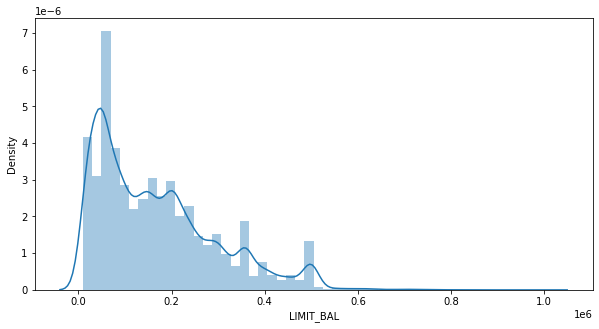

In [ ]:
# Plotting the distribution of Limit Balance feature
plt.figure(figsize = (10,5))
sns.distplot(credit_df['LIMIT_BAL'], kde = True)
plt.show()

**From the above distibution we can say that**
* ***Maximum amount of given credit is 50000 NT dollars followed by 30000 and 20000.***

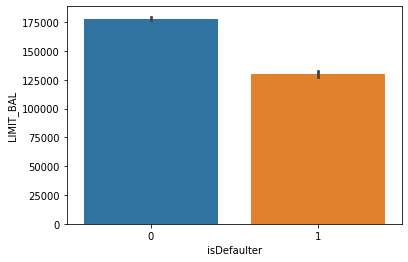

In [ ]:
# Plotting the bar plot for better visualization with respect to default payment next month
sns.barplot(x = 'isDefaulter', y='LIMIT_BAL', data = credit_df)

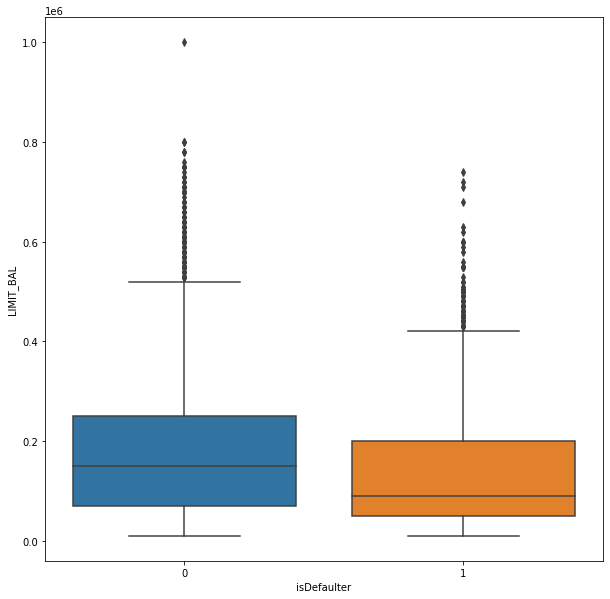

In [ ]:
#plotting the box plot to vizualize the data distribution
plt.figure(figsize=(10,10))
ax = sns.boxplot(x="isDefaulter", y="LIMIT_BAL", data=credit_df)

**From the above analysis we can say that,**
* Non defaulters have greater limit balance than that of defaulters.
* There are outliers present in the Limit balance feature. 

## **Renaming columns**

In [ ]:
# renaming columns for convenience and understability

credit_df.rename(columns={'PAY_0':'PAY_SEPT','PAY_2':'PAY_AUG','PAY_3':'PAY_JUL','PAY_4':'PAY_JUN','PAY_5':'PAY_MAY','PAY_6':'PAY_APR'},inplace=True)
credit_df.rename(columns={'BILL_AMT1':'BILL_AMT_SEPT','BILL_AMT2':'BILL_AMT_AUG','BILL_AMT3':'BILL_AMT_JUL','BILL_AMT4':'BILL_AMT_JUN','BILL_AMT5':'BILL_AMT_MAY','BILL_AMT6':'BILL_AMT_APR'}, inplace = True)
credit_df.rename(columns={'PAY_AMT1':'PAY_AMT_SEPT','PAY_AMT2':'PAY_AMT_AUG','PAY_AMT3':'PAY_AMT_JUL','PAY_AMT4':'PAY_AMT_JUN','PAY_AMT5':'PAY_AMT_MAY','PAY_AMT6':'PAY_AMT_APR'},inplace=True)

In [ ]:
# Checking the renamed columns
credit_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 26 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   ID             30000 non-null  int64   
 1   LIMIT_BAL      30000 non-null  int64   
 2   SEX            30000 non-null  int64   
 3   EDUCATION      30000 non-null  int64   
 4   MARRIAGE       30000 non-null  int64   
 5   AGE            30000 non-null  int64   
 6   PAY_SEPT       30000 non-null  int64   
 7   PAY_AUG        30000 non-null  int64   
 8   PAY_JUL        30000 non-null  int64   
 9   PAY_JUN        30000 non-null  int64   
 10  PAY_MAY        30000 non-null  int64   
 11  PAY_APR        30000 non-null  int64   
 12  BILL_AMT_SEPT  30000 non-null  int64   
 13  BILL_AMT_AUG   30000 non-null  int64   
 14  BILL_AMT_JUL   30000 non-null  int64   
 15  BILL_AMT_JUN   30000 non-null  int64   
 16  BILL_AMT_MAY   30000 non-null  int64   
 17  BILL_AMT_APR   30000 non-null  

In [ ]:
credit_df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_SEPT,PAY_AUG,PAY_JUL,PAY_JUN,PAY_MAY,PAY_APR,BILL_AMT_SEPT,BILL_AMT_AUG,BILL_AMT_JUL,BILL_AMT_JUN,BILL_AMT_MAY,BILL_AMT_APR,PAY_AMT_SEPT,PAY_AMT_AUG,PAY_AMT_JUL,PAY_AMT_JUN,PAY_AMT_MAY,PAY_AMT_APR,isDefaulter,AGE_BIN
0,1,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1,21-30
1,2,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1,21-30
2,3,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0,31-40
3,4,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0,31-40
4,5,50000,1,2,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0,51-60


## **Total Bill Amount**

In [ ]:
# assign the bill amount variable to a single variable
total_bill_amt_df = credit_df[['BILL_AMT_SEPT',	'BILL_AMT_AUG',	'BILL_AMT_JUL',	'BILL_AMT_JUN',	'BILL_AMT_MAY',	'BILL_AMT_APR', 'isDefaulter']]

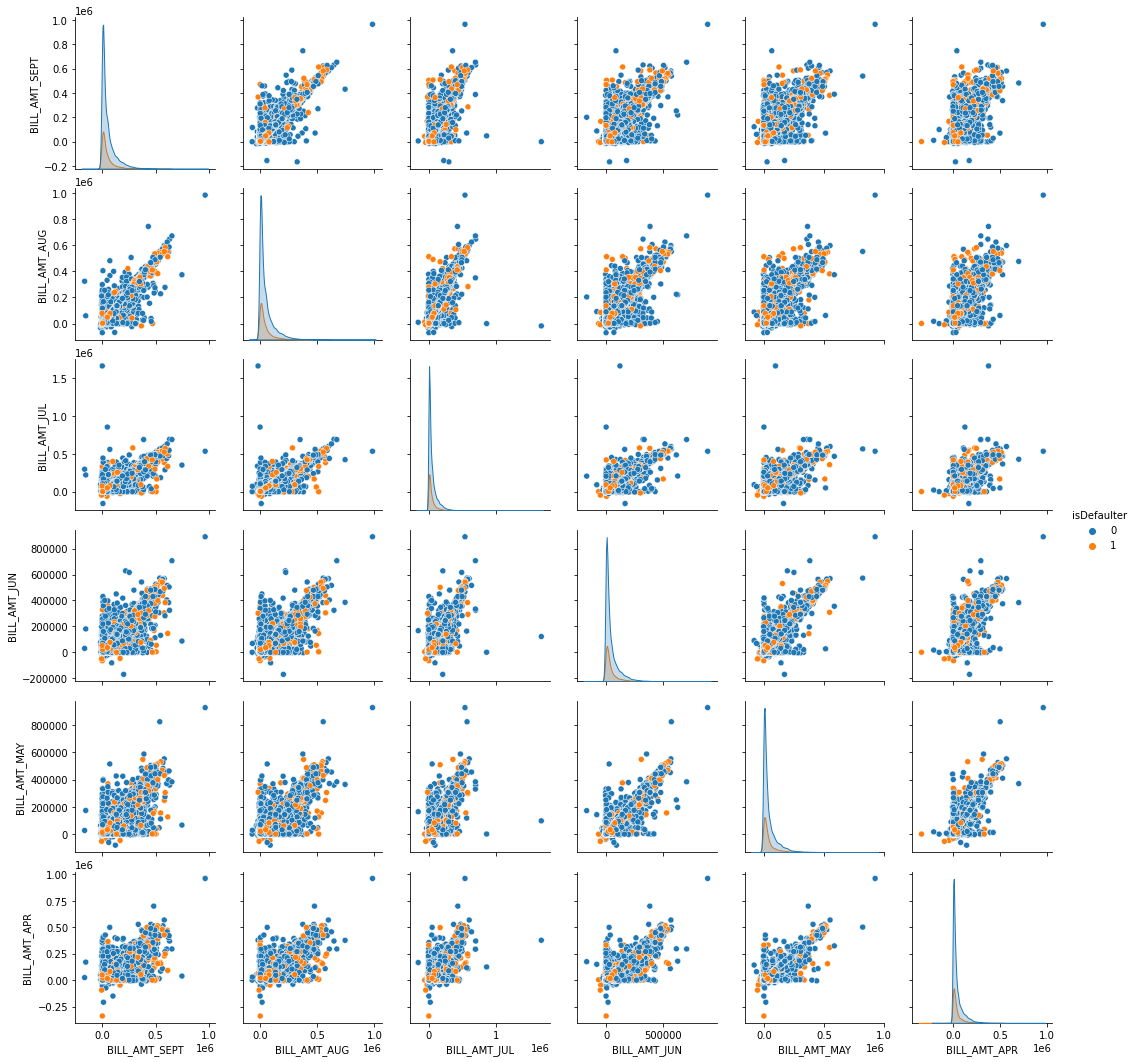

In [ ]:
# plotting pair plot for bill amount for better visualization
sns.pairplot(data = total_bill_amt_df, hue = 'isDefaulter')

***The above pairplot indicates that defaulters have less bill amount compared to non defaulters.***

### **Previous payment status**

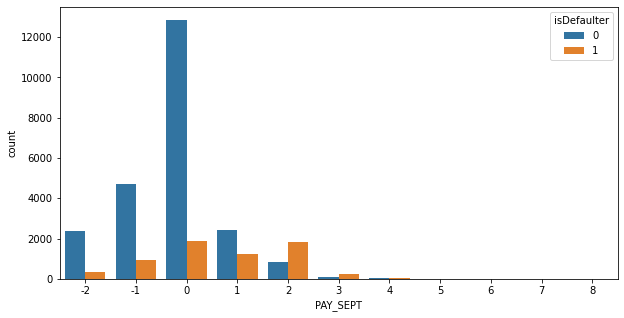

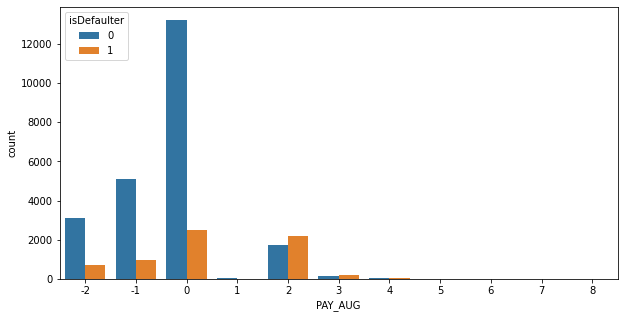

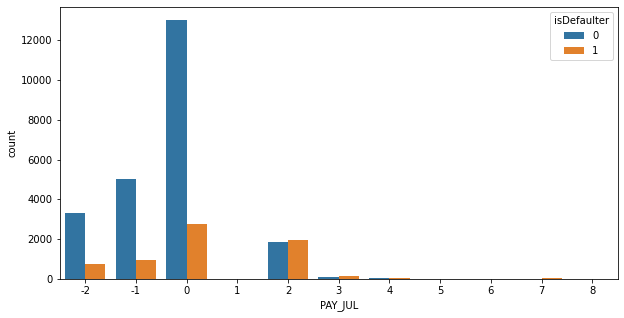

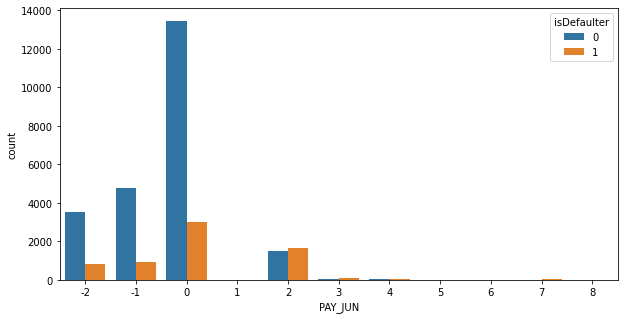

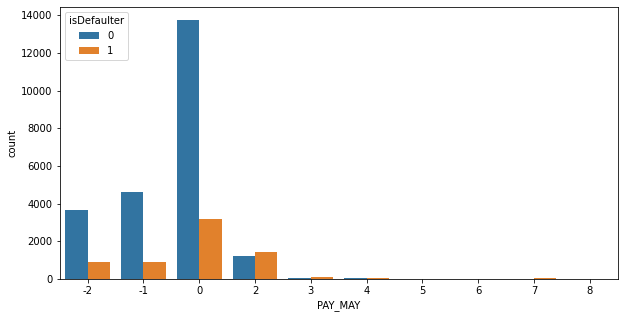

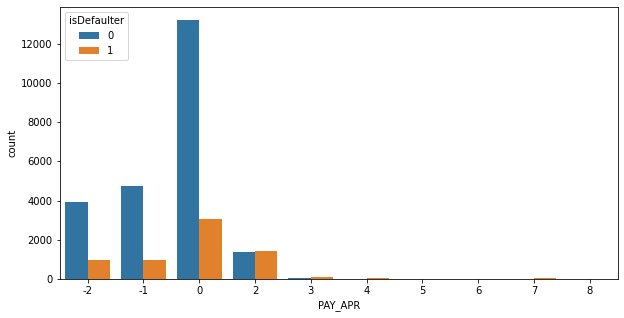

In [ ]:
#plotting count of customers who paid in each month
pay_col = ['PAY_SEPT',	'PAY_AUG',	'PAY_JUL',	'PAY_JUN',	'PAY_MAY',	'PAY_APR']
for col in pay_col:
  plt.figure(figsize=(10,5))
  sns.countplot(x = col, hue = 'isDefaulter', data = credit_df)

**Scale for x-axis is as follows,**
* **0 - use of revolving credit (paid minimum only)**
* **1 - payment delay for 1 month**
* **2 - payment delay for 2 months**
* **3 - payment delay for 3 months**
* **4 - payment delay for 4 months**
* **5 - payment delay for 5 months**
* **6 - payment delay for 6 months**
* **7 - payment delay for 7 months**
* **8 - payment delay for 8 months**
* **-1 - paid in full**
* **-2 - No consumption**
**From the above plot we can say that,**
* **Large number of non defaulters use revolving credit, they pay minimum amount.**
* **There are some non defaulters and defaulters who delay payment by 2 months.**
* **More number of Non defaulters make full payment as compared to defaulters.**
* **More number of non defaulters do not consume balance as compared to defaulters.**

### **Paid Amount**

In [ ]:
#Assigning paid amounts of each month to a single variable
pay_amt_df = credit_df[['PAY_AMT_SEPT', 'PAY_AMT_AUG', 'PAY_AMT_JUL',	'PAY_AMT_JUN',	'PAY_AMT_MAY',	'PAY_AMT_APR', 'isDefaulter']]

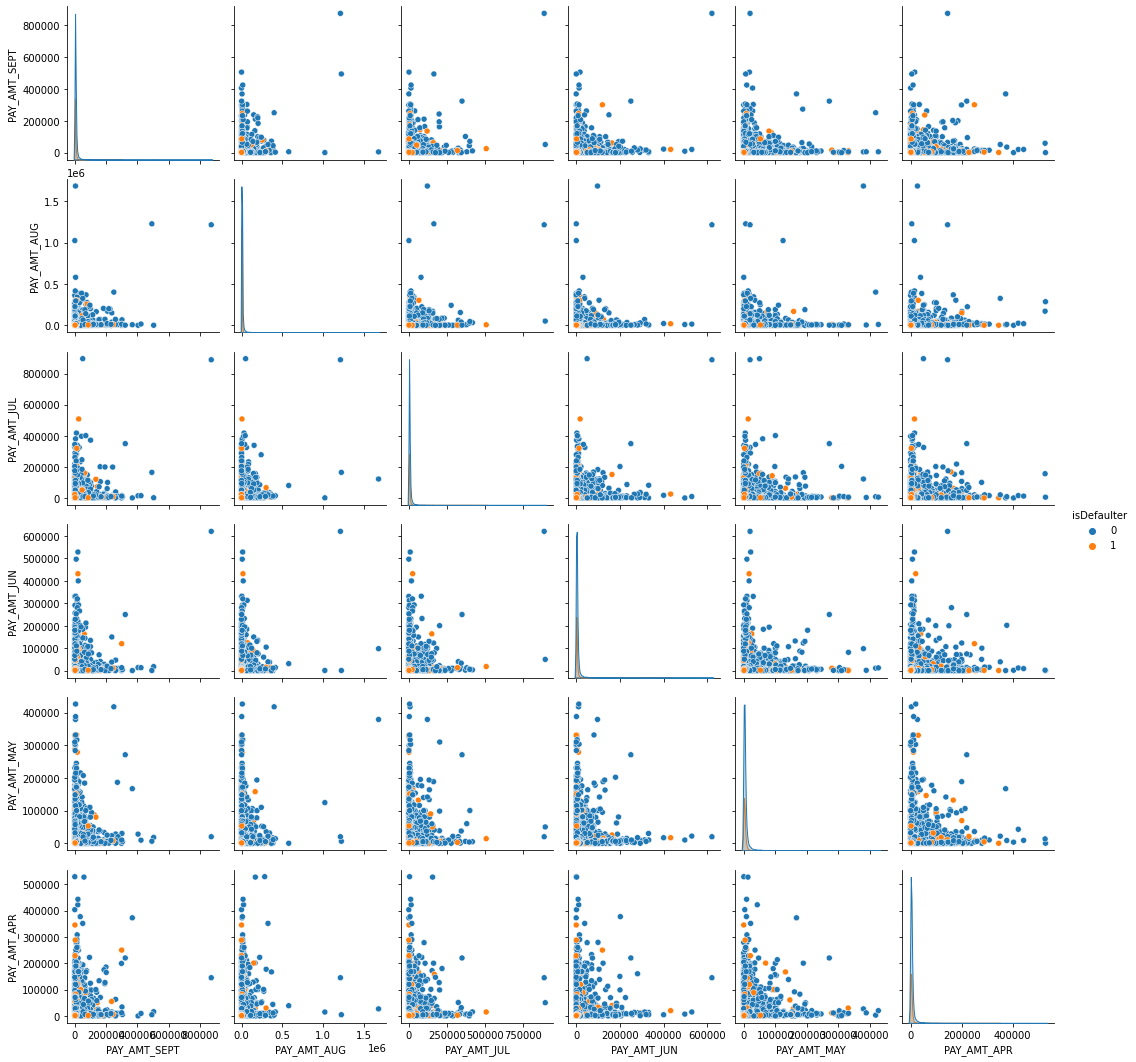

In [ ]:
# Plotting the pair plot for paid amount
sns.pairplot(data = pay_amt_df, hue = 'isDefaulter')

**From the above pairplot we can say that,**
* **

## **Bivariate Analysis**
**what is bivariate analysis**
* ***Bivariate analysis is one of the simplest forms of quantitative analysis. It involves the analysis of two variables, for the purpose of determining the empirical relationship between them. Bivariate analysis can be helpful in testing simple hypotheses of association***

In [ ]:
#creating variable for categorie
categ_features = ['SEX', 'EDUCATION', 'MARRIAGE']

In [ ]:
# adding the dependent variable
cred_df_cat = credit_df[categ_features]
cred_df_cat['Defaulter'] = credit_df['isDefaulter']

In [ ]:
#again replacing the numerical vaule  to categorical vaule 
cred_df_cat.replace({'SEX': {1 : 'MALE', 2 : 'FEMALE'}, 'EDUCATION' : {1 : 'graduate school', 2 : 'university', 3 : 'high school', 4 : 'others'}, 'MARRIAGE' : {1 : 'married', 2 : 'single', 3 : 'others'}}, inplace = True)

<Figure size 1080x576 with 0 Axes>

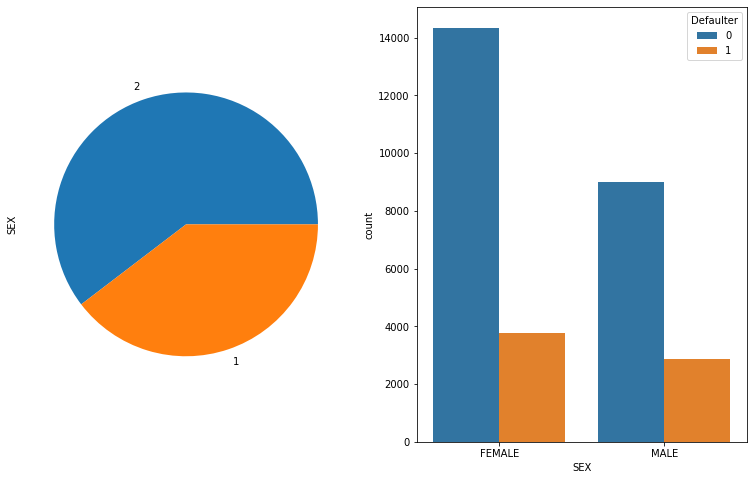

<Figure size 1080x576 with 0 Axes>

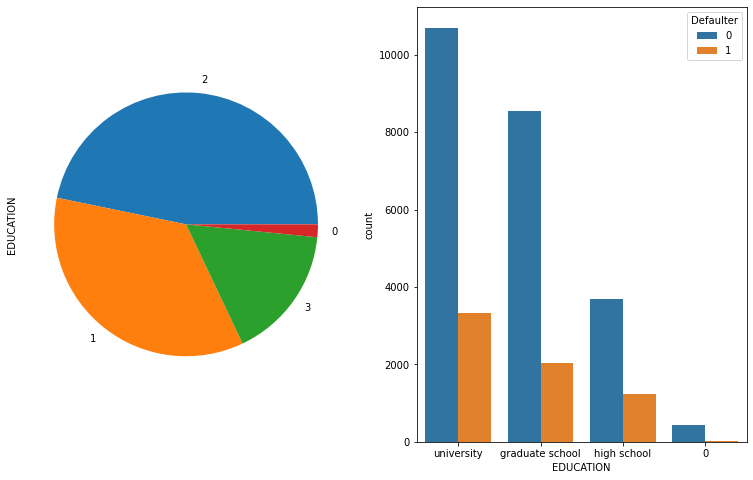

<Figure size 1080x576 with 0 Axes>

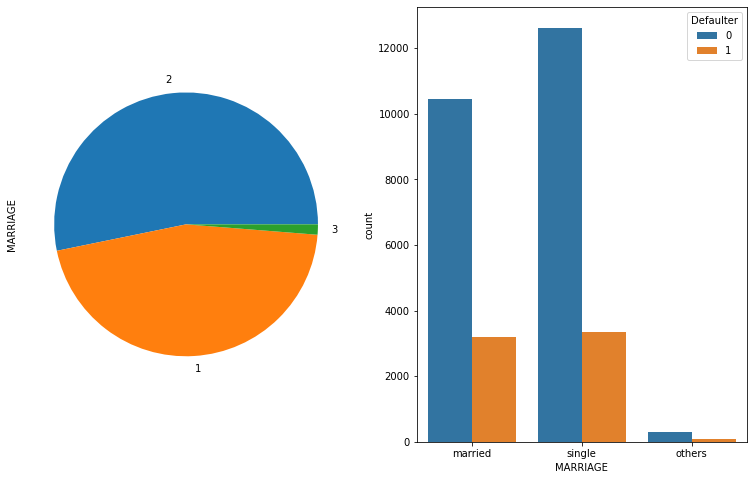

In [ ]:
#plot for all the respective categorical variable
for col in categ_features:
  plt.figure(figsize=(15,8))
  fig, axes = plt.subplots(ncols=2,figsize=(13,8))
  credit_df[col].value_counts().plot(kind="pie",ax = axes[0],subplots=True)
  sns.countplot(x = col, hue = 'Defaulter', data = cred_df_cat)

* ***It is evident that from above plot that number of defaulters have high proportion of females.***
* ***The higher number of defaulters are university graduates as well as single***

### Understanding relation between bill amount and payment done in 6 months.

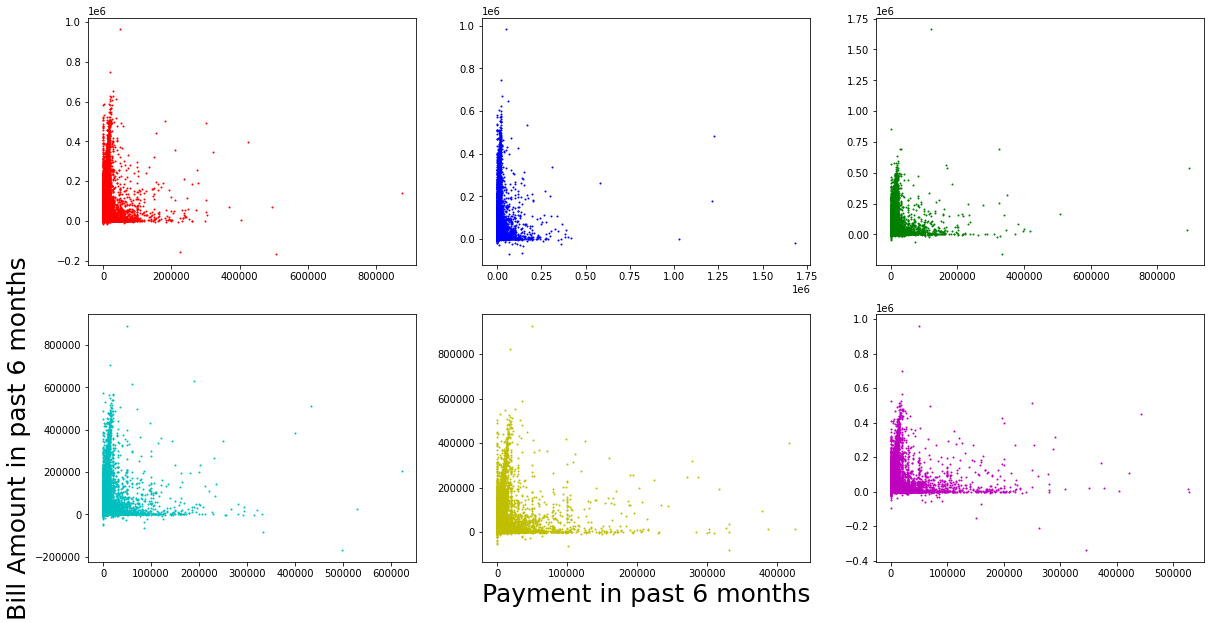

In [ ]:

plt.subplots(figsize=(20,10))

plt.subplot(231)
plt.scatter(x=credit_df.PAY_AMT_SEPT, y=credit_df.BILL_AMT_SEPT, c='r', s=1)

plt.subplot(232)
plt.scatter(x=credit_df.PAY_AMT_AUG, y=credit_df.BILL_AMT_AUG, c='b', s=1)

plt.subplot(233)
plt.scatter(x=credit_df.PAY_AMT_JUL, y=credit_df.BILL_AMT_JUL, c='g', s=1)

plt.subplot(234)
plt.scatter(x=credit_df.PAY_AMT_JUN, y=credit_df.BILL_AMT_JUN, c='c', s=1)
plt.ylabel("Bill Amount in past 6 months", fontsize=25)

plt.subplot(235)
plt.scatter(x=credit_df.PAY_AMT_MAY, y=credit_df.BILL_AMT_MAY, c='y', s=1)
plt.xlabel("Payment in past 6 months", fontsize=25)

plt.subplot(236)
plt.scatter(x=credit_df.PAY_AMT_APR, y=credit_df.BILL_AMT_APR, c='m', s=1)

plt.show()

* **Above plot indicates that there is higher proportion of clients for whom the bill amount is high but payment done against the same is very low.** 
* **This we can infer since maximum of data points are closely packed along the Y-axis near to 0 on X-axis.**

## **Checking Correlation between variables**

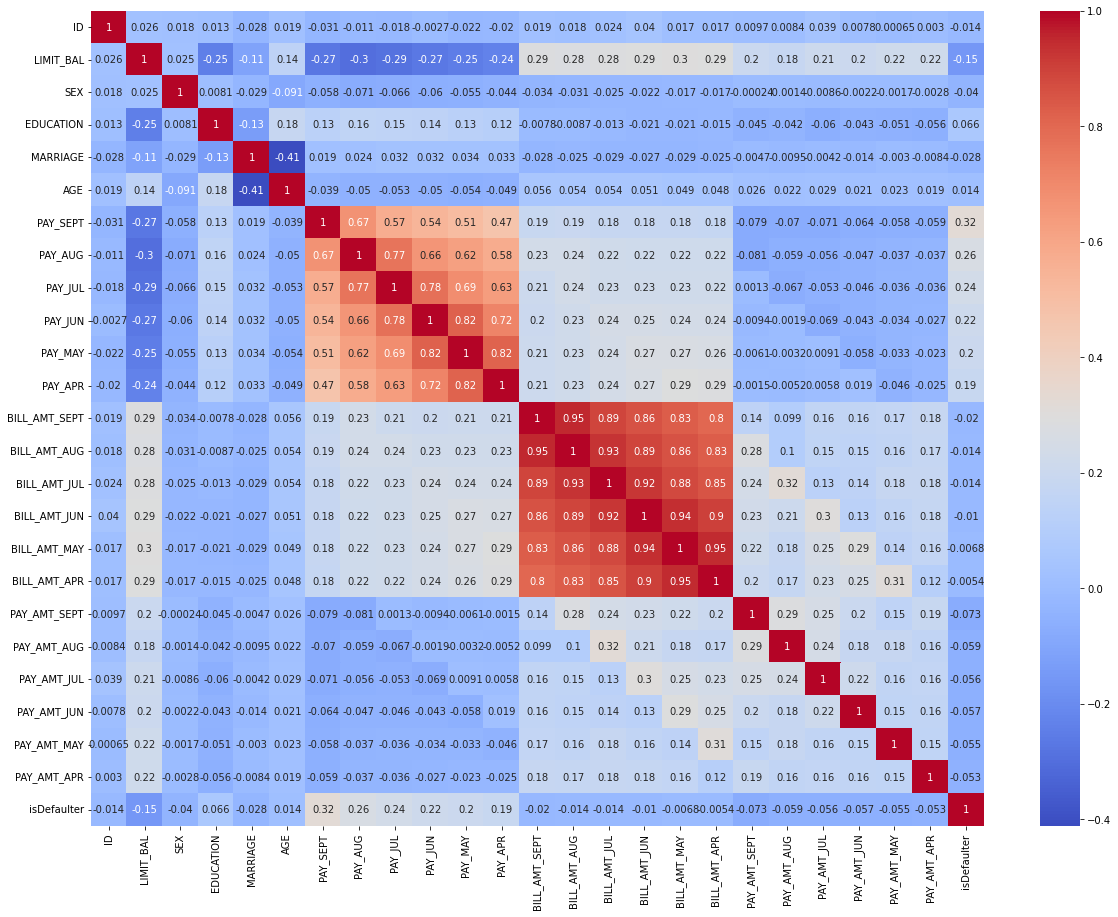

In [ ]:
#plotting the heatmap 
plt.figure(figsize=(20,15))
sns.heatmap(credit_df.corr(),annot=True,cmap="coolwarm")

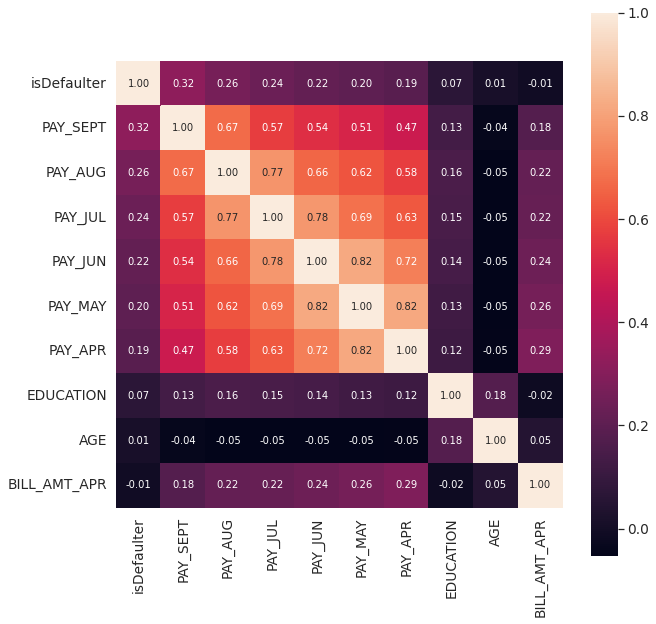

In [ ]:
#saleprice correlation matrix
k = 10 #number of variables for heatmap
corrmat = credit_df.corr()
cols = corrmat.nlargest(k, 'isDefaulter')['isDefaulter'].index
cm = np.corrcoef(credit_df[cols].values.T)
sns.set(font_scale=1.25)
plt.subplots(figsize=(10,10))
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

## **SMOTE**

* ***The depedent variable is imbalanced in the data, it generally happens when observations in one of the class are much higher than the other class. ***
* ***As machine learning algorithms tend to increase accuracy by reducing the error, they do not consider the class distribution.***
* ***Standard ML techniques such as Decision Tree and Logistic Regression have a bias towards the majority class.***

***SMOTE***
* **SMOTE (Synthetic Minority Oversampling Technique) - Oversampling is one of the most commonly used method to solve imbalance problem. It aims to balance the class distribution by randomly increasing minority class examples by replacing them.**

In [ ]:
#import the module 
from imblearn.over_sampling import SMOTE

smote = SMOTE()

# fit predictor and target variable
x_smote, y_smote = smote.fit_resample(credit_df.iloc[:,0:-1], credit_df['isDefaulter'])

print('Original dataset shape', len(credit_df))
print('Resampled dataset shape', len(y_smote))

Original dataset shape 30000
Resampled dataset shape 46728


In [ ]:
x_smote

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_SEPT,PAY_AUG,PAY_JUL,PAY_JUN,PAY_MAY,PAY_APR,BILL_AMT_SEPT,BILL_AMT_AUG,BILL_AMT_JUL,BILL_AMT_JUN,BILL_AMT_MAY,BILL_AMT_APR,PAY_AMT_SEPT,PAY_AMT_AUG,PAY_AMT_JUL,PAY_AMT_JUN,PAY_AMT_MAY,PAY_AMT_APR,isDefaulter
0,1,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46723,15233,455823,2,1,1,36,0,0,0,0,0,0,439158,446118,445768,449414,397260,390813,16028,17549,17292,13940,14058,14479,1
46724,18329,20000,2,2,1,24,1,1,0,0,0,2,6463,6628,7786,8875,10208,10011,421,1428,1380,1587,156,106,1
46725,25770,70000,1,2,2,41,0,0,2,0,0,0,69349,71721,69998,70348,48442,45323,5840,0,2943,1031,1644,1872,1
46726,1646,50000,1,1,1,34,1,1,1,1,2,2,36550,36016,38937,38621,42366,41819,337,3578,560,4397,286,4114,1


In [ ]:
columns = list(credit_df.columns)

In [ ]:
columns.pop(-2)

'isDefaulter'

In [ ]:
balance_df = pd.DataFrame(x_smote, columns = columns)

In [ ]:
balance_df['isDefaulter'] = y_smote

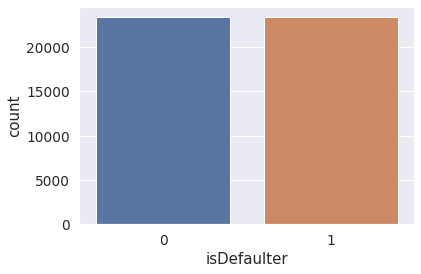

In [ ]:
# Checking the class balance after using SMOTE
sns.countplot('isDefaulter', data = balance_df)

***As we can see from above countplot,the isDefaulter class is balanced.***

## **Feature Engineering**

In [ ]:
# saving a copy in other variable
credit_df_copy = balance_df.copy()

In [ ]:
credit_df_copy.head()


,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_SEPT,PAY_AUG,PAY_JUL,PAY_JUN,PAY_MAY,PAY_APR,BILL_AMT_SEPT,BILL_AMT_AUG,BILL_AMT_JUL,BILL_AMT_JUN,BILL_AMT_MAY,BILL_AMT_APR,PAY_AMT_SEPT,PAY_AMT_AUG,PAY_AMT_JUL,PAY_AMT_JUN,PAY_AMT_MAY,PAY_AMT_APR,AGE_BIN,isDefaulter
0,1,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,NaN,1
1,2,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,NaN,1
2,3,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,NaN,0
3,4,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,NaN,0
4,5,50000,1,2,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,NaN,0
